In [1]:
""" 
pip install -U scikit-learn scipy matplotlib
ipython kernel install --user --name=kitchen
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from os.path import abspath, join
import os

DATABASE_DIR = abspath(join(abspath(''), '..', 'databases'))
NPY_DIR = join(DATABASE_DIR, 'gmm')

In [9]:
def load_df(file_name="place.csv"):
    df = pd.read_csv(join(DATABASE_DIR, file_name), index_col=0)
    print(df.Movable.unique())
    print(df.Surface.unique())
    print(df.groupby(['Movable','Surface']).size().to_string())
    return df

def get_samples(df, cat, surface):
    sub_df = df[(df.Movable==cat) & (df.Surface==surface)]
    X = sub_df[["x", "yaw"]].to_numpy()  ## "y", 
    return X

def fit_gmm(x):
    # Learn Gaussian Mixture
    num_components = 30
    gmm = GaussianMixture(n_components=num_components).fit(X)
    return gmm

def save_gmm(gmm, gmm_name):
    np.save(join(NPY_DIR, gmm_name + '_weights'), gmm.weights_, allow_pickle=False)
    np.save(join(NPY_DIR, gmm_name + '_means'), gmm.means_, allow_pickle=False)
    np.save(join(NPY_DIR, gmm_name + '_covariances'), gmm.covariances_, allow_pickle=False)

def load_gmm(gmm_name):
    means = np.load(join(NPY_DIR, gmm_name + '_means.npy'))
    covar = np.load(join(NPY_DIR, gmm_name + '_covariances.npy'))
    loaded_gmm = GaussianMixture(n_components = len(means), covariance_type='full')
    loaded_gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covar))
    loaded_gmm.weights_ = np.load(join(NPY_DIR, gmm_name + '_weights.npy'))
    loaded_gmm.means_ = means
    loaded_gmm.covariances_ = covar
    return loaded_gmm

def plot_samples(df, cat=None, surface=None):
    if cat is None and surface is not None:
        sub_df = df[df.Surface==surface]
    elif cat is not None and surface is None:
        sub_df = df[df.Movable==cat]
    else:
        sub_df = df[(df.Movable==cat) & (df.Surface==surface)]
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))

    X = sub_df[["x", "yaw"]].to_numpy()
    ax[0].scatter(X[:,0], X[:,1])
    ax[0].set_title("X and yaw", fontsize=14)
    ax[0].set_xlabel("X", fontsize=14)
    ax[0].set_ylabel("yaw", fontsize=14)

    X = sub_df[["x", "y"]].to_numpy()
    ax[1].scatter(X[:,0], X[:,1])
    ax[1].set_title("X and Y", fontsize=14)
    ax[1].set_xlabel("X", fontsize=14)
    ax[1].set_ylabel("Y", fontsize=14)
    plt.show()
    
def plot_gmm(gmm, X):
    # Sample Data
    num_original_data = X.shape[0]
    sampled_X = gmm.sample(num_original_data)[0]

    # Post process
    # truncate radians outside [-pi, pi]
    sampled_X[sampled_X[:,0] > np.pi, 0] = np.pi
    sampled_X[sampled_X[:,0] < -np.pi, 0] = -np.pi
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))

    ax[0].scatter(sampled_X[:,0], sampled_X[:,1])
    ax[0].set_title("Sampled Data", fontsize=14)
    ax[0].set_xlabel("Distance", fontsize=14)
    ax[0].set_ylabel("Radian", fontsize=14)

    ax[1].scatter(X[:,0], X[:,1])
    ax[1].set_title("Original Data", fontsize=14)
    ax[1].set_xlabel("Distance", fontsize=14)
    ax[1].set_ylabel("Radian", fontsize=14)
    plt.show()
    
    
df = load_df()

['veggietomato' 'veggiepotato' 'veggiecabbage' 'veggieartichoke'
 'veggiezucchini' 'bottle' 'medicine' 'veggiesweetpotato' 'braiserlid']
['BraiserBody/100021' 'BraiserBody/100023' 'Sink/100501'
 'BraiserBody/100693' 'CabinetTop/00001' 'Sink/1023790' 'MiniFridge/11178'
 'CabinetTop/00002' 'Sink/100685' 'BraiserBody/100017' 'Sink/101176'
 'Sink/100191' 'MiniFridge/12249' 'MiniFridge/11231' 'CabinetTop/00003'
 'BraiserBody/100015' 'MiniFridge/10849' 'MiniFridge/12252'
 'MiniFridge/10797' 'MiniFridge/11709' 'BraiserBody/100038' 'Sink/00003'
 'Sink/00005' 'Sink/102379' 'box']
Movable            Surface           
bottle             CabinetTop/00001      120
                   CabinetTop/00002       85
                   CabinetTop/00003      101
                   MiniFridge/10797       90
                   MiniFridge/10849       58
                   MiniFridge/11178       92
                   MiniFridge/11231      121
                   MiniFridge/11709       47
                   MiniF

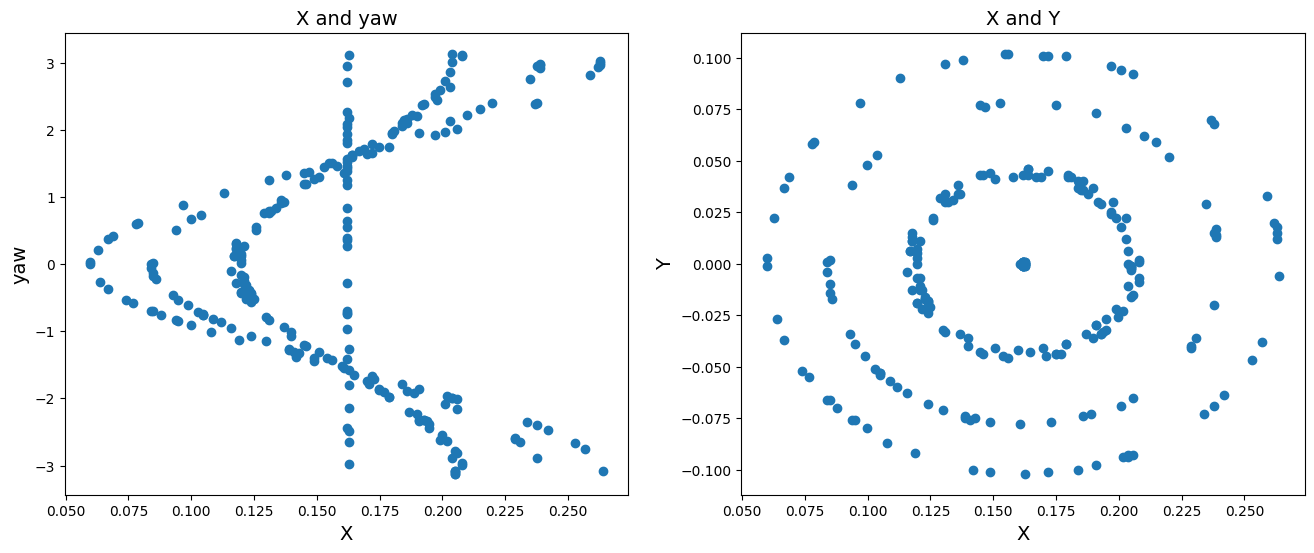

In [15]:
plot_samples(df, surface='BraiserBody/100015')

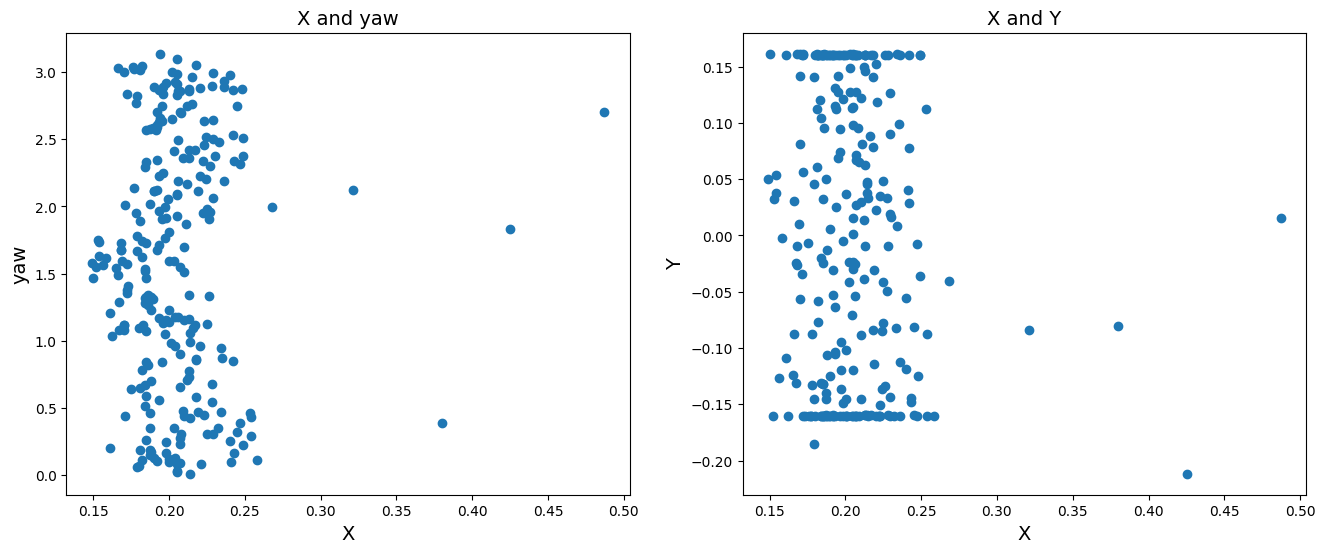

In [17]:
plot_samples(df, surface='MiniFridge/10849')

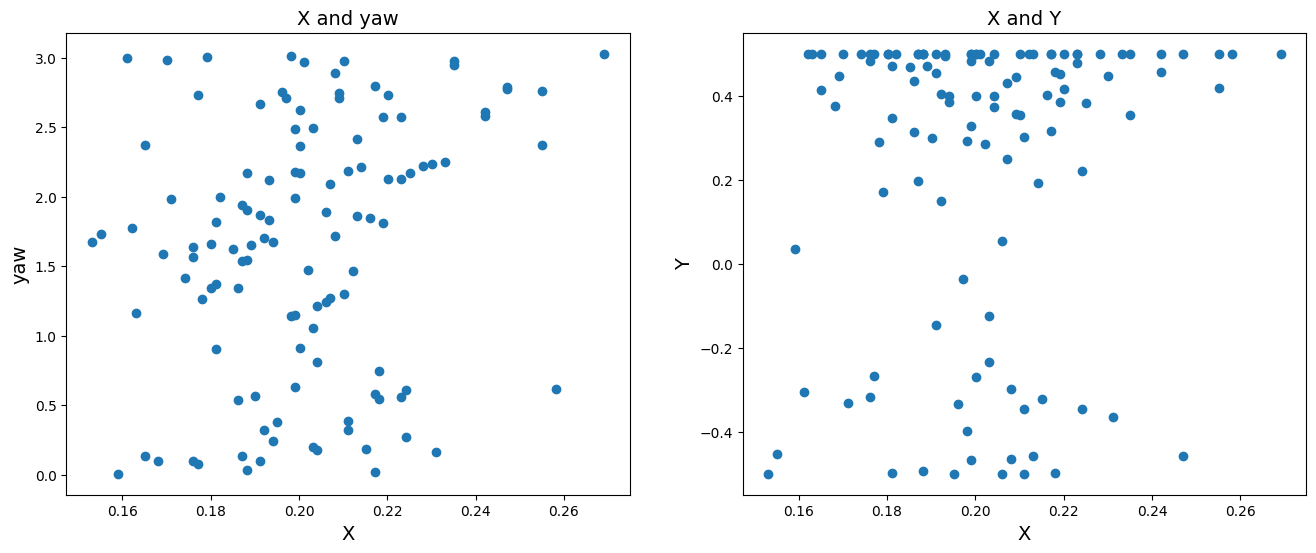

In [20]:
plot_samples(df, surface='MiniFridge/11709')

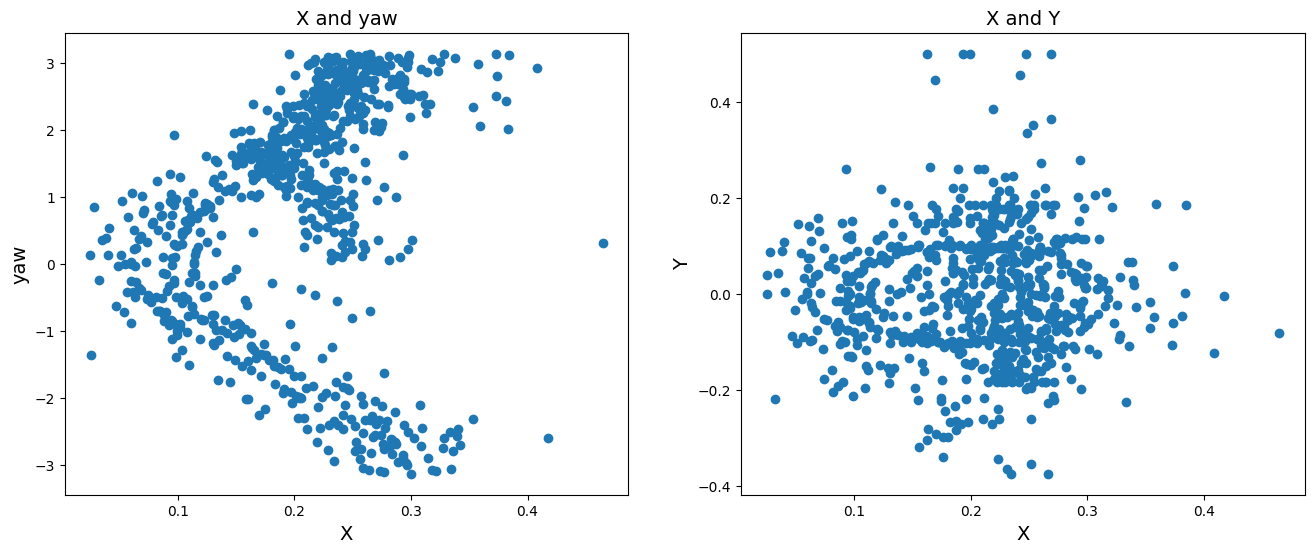

In [14]:
plot_samples(df, cat='veggiezucchini')

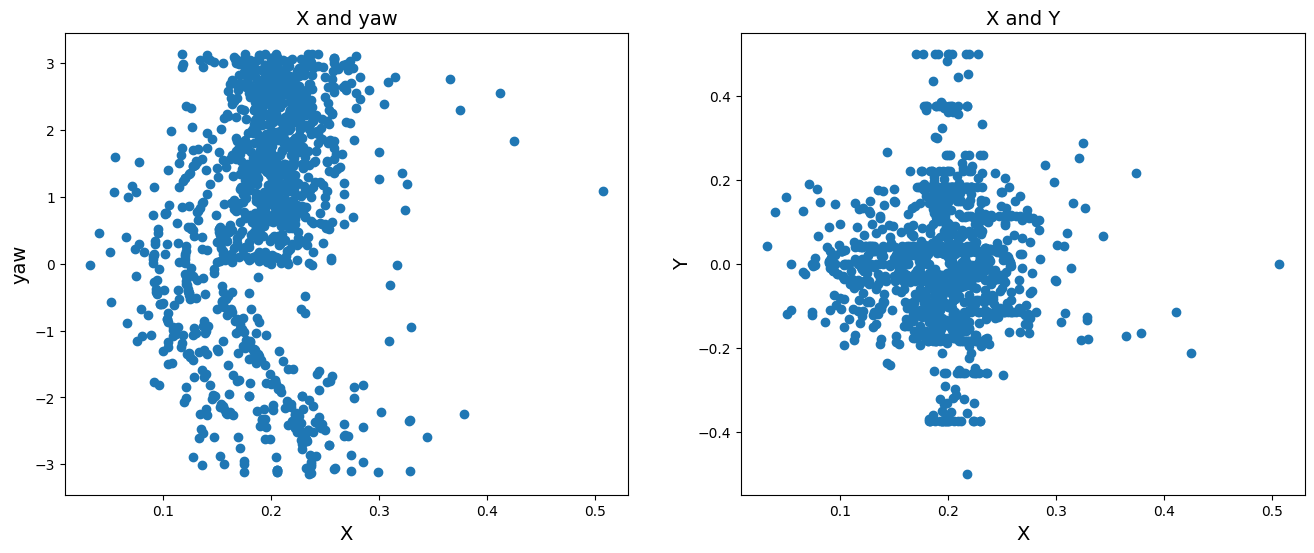

In [10]:
plot_samples(df, cat='veggiecabbage')

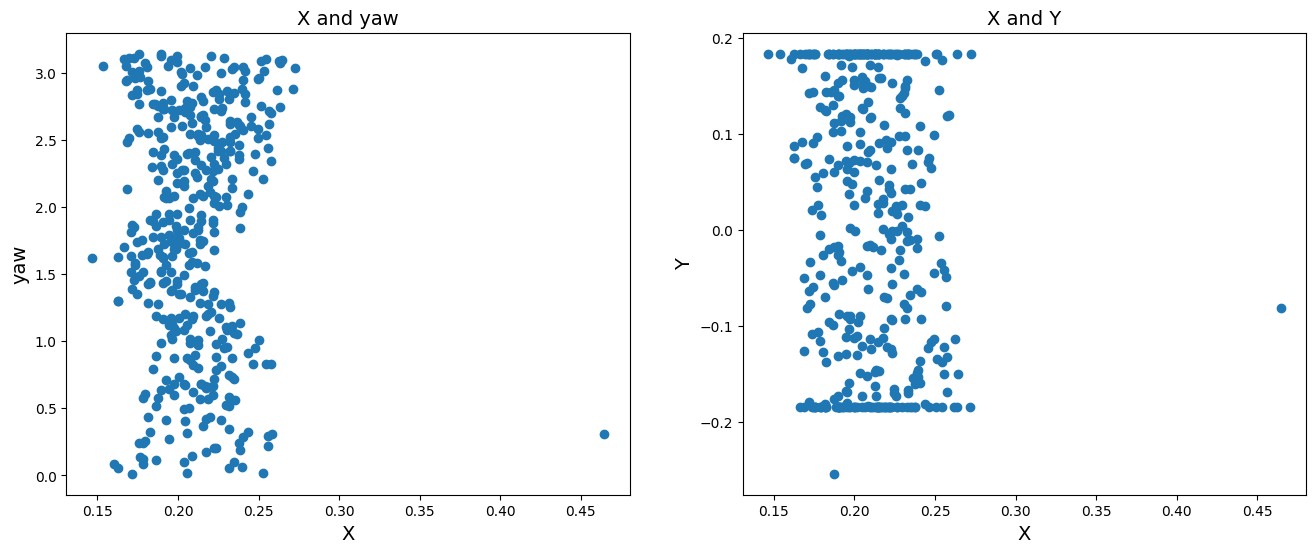

In [11]:
plot_samples(df, surface='CabinetTop/00001')

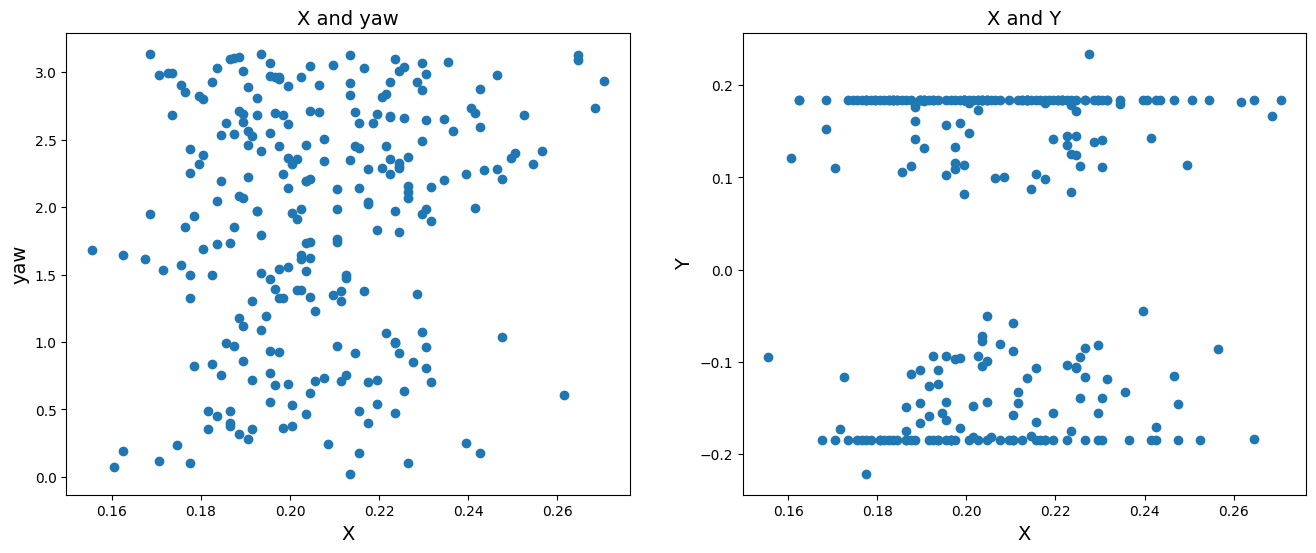

In [12]:
plot_samples(df, surface='CabinetTop/00002')

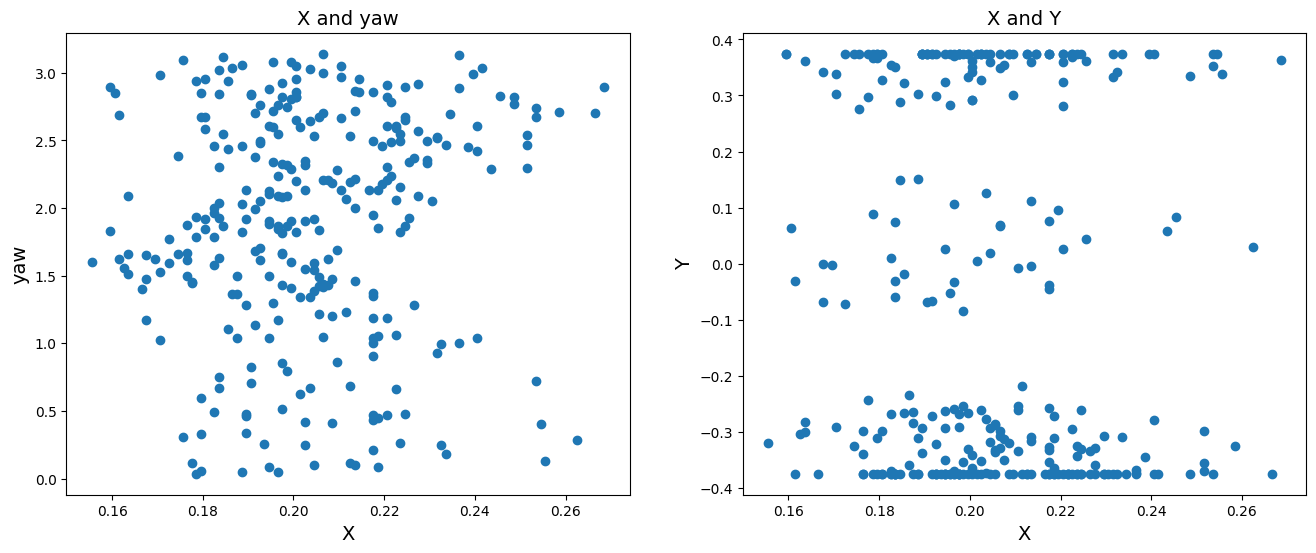

In [13]:
plot_samples(df, surface='CabinetTop/00003')

In [4]:
df = load_df('pick.csv')

['veggietomato' 'veggiepotato' 'veggiecabbage' 'veggieartichoke'
 'veggiezucchini' 'bottle' 'medicine' 'veggiesweetpotato' 'braiserlid']
['box' 'Microwave/7119' 'Microwave/7167' 'Microwave/7263' 'Sink/00003'
 'Microwave/7128' 'Microwave/7236' 'Microwave/7310' 'Sink/00005'
 'Sink/100191' 'BraiserBody/100017' 'BraiserBody/100015'
 'BraiserBody/100023' 'Sink/100685' 'BraiserBody/100038' 'Sink/1023790'
 'Sink/101176' 'Sink/100501' 'Sink/102379' 'BraiserBody/100021'
 'BraiserBody/100693' 'OvenCounter/101930' 'MiniFridge/12252'
 'BraiserBody/100045' 'CabinetTop/00001']
Movable            Surface           
bottle             CabinetTop/00001        1
                   Sink/00003             91
                   Sink/00005            114
                   Sink/100191           100
                   Sink/100501            66
                   Sink/100685            71
                   Sink/101176            74
                   Sink/102379            45
                   Sink/1023790 

In [ ]:
# X = get_samples(df, cat='veggiecabbage')
# gmm = fit_gmm(X)
# save_gmm(gmm, gmm_name='veggiecabbage_anywhere')
# loaded_gmm = load_gmm(gmm_name='veggiecabbage_anywhere')
# plot_gmm(loaded_gmm, X)